## Title: Which gender is more likely interested in each type of school?
### Name: Xueying Chen
### UNI: xc2578

In [1]:
import numpy as np
import pandas as pd
import nltk
import collections
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import time
 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
# data overview

In [3]:
df=pd.read_csv("/Users/carac./desktop/Fall2021-Project1-XYC67/data/philosophy_data.csv")
df.head()

title author school  \
0  Plato - Complete Works  Plato  plato   
1  Plato - Complete Works  Plato  plato   
2  Plato - Complete Works  Plato  plato   
3  Plato - Complete Works  Plato  plato   
4  Plato - Complete Works  Plato  plato   

                                      sentence_spacy  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

                                        sentence_str  \
0   What's new, Socrates, to make you leave your ...   
1  Surely you are not prosecuting anyone before t...   
2  The Athenians do not call this a prosecution b...   
3                              What is this you say?   
4  Someone must have indicted you, for you are no...   

   original_publication_date  corpus_edition_date  sentence_length  \
0                       -350                 1997              125   
1                       -350                 1997               69   
2                       -350                 1997               74   
3                       -350                 1997               21   
4                       -350                 1997              101   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  \
0  ['what', 'new', 'socrates', 'to', 'make', 'you...   
1  ['surely', 'you', 'are', 'not', 'prosecuting',...   
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...   
3               ['what', 'is', 'this', 'you', 'say']   
4  ['someone', 'must', 'have', 'indicted', 'you',...   

                                      lemmatized_str  
0     what be new , Socrates , to make -PRON- lea...  
1   surely -PRON- be not prosecute anyone before ...  
2   the Athenians do not call this a prosecution ...  
3                          what be this -PRON- say ?  
4   someone must have indict -PRON- , for -PRON- ...

In [4]:
# Data cleaning and Processing

In [5]:
final_df = df[['title','author','school', 'corpus_edition_date', 'sentence_lowered', 'tokenized_txt']]
final_df.head()

title author school  corpus_edition_date  \
0  Plato - Complete Works  Plato  plato                 1997   
1  Plato - Complete Works  Plato  plato                 1997   
2  Plato - Complete Works  Plato  plato                 1997   
3  Plato - Complete Works  Plato  plato                 1997   
4  Plato - Complete Works  Plato  plato                 1997   

                                    sentence_lowered  \
0   what's new, socrates, to make you leave your ...   
1  surely you are not prosecuting anyone before t...   
2  the athenians do not call this a prosecution b...   
3                              what is this you say?   
4  someone must have indicted you, for you are no...   

                                       tokenized_txt  
0  ['what', 'new', 'socrates', 'to', 'make', 'you...  
1  ['surely', 'you', 'are', 'not', 'prosecuting',...  
2  ['the', 'athenians', 'do', 'not', 'call', 'thi...  
3               ['what', 'is', 'this', 'you', 'say']  
4  ['someone', 'must', 'have', 'indicted', 'you',...

In [6]:
pd.DataFrame(final_df.groupby(by = ['title', 'school', 'corpus_edition_date'])['title'].count())

title
title                                              school          corpus_edition_date       
A General Theory Of Employment, Interest, And M... capitalism      2003                  3411
A Treatise Concerning The Principles Of Human K... empiricism      2009                  1040
A Treatise Of Human Nature                         empiricism      2003                  7047
Anti-Oedipus                                       continental     1997                  6679
Aristotle - Complete Works                         aristotle       1991                 48779
Being And Time                                     phenomenology   1996                  8505
Beyond Good And Evil                               nietzsche       2003                  1906
Capital                                            communism       1887                 12996
Critique Of Judgement                              german_idealism 2007                  4204
Critique Of Practical Reason                       german_idealism 2002                  2452
Critique Of Pure Reason                            german_idealism 1998                  7472
Dialogues Concerning Natural Religion              empiricism      2009                  1265
Difference And Repetition                          continental     1994                  5861
Discourse On Method                                rationalism     2008                   340
Ecce Homo                                          nietzsche       2016                  1504
Elements Of The Philosophy Of Right                german_idealism 1991                  4923
Enchiridion                                        stoicism        2014                   323
Essay Concerning Human Understanding               empiricism      2004                  7742
Essential Works Of Lenin                           communism       1966                  4469
Ethics                                             rationalism     2003                  3304
History Of Madness                                 continental     2006                  8033
Lewis - Papers                                     analytic        2008                 13120
Meditations                                        stoicism        2008                  2212
Meditations On First Philosophy                    rationalism     2008                   792
Naming And Necessity                               analytic        1990                  2681
Off The Beaten Track                               phenomenology   2001                  6734
On Certainty                                       analytic        1969                  1984
On The Improvement Of Understanding                rationalism     1997                   489
On The Principles Of Political Economy And Taxa... capitalism      2010                  3090
Philosophical Investigations                       analytic        1986                  5838
Philosophical Studies                              analytic        2015                  3668
Philosophical Troubles                             analytic        2011                  9798
Plato - Complete Works                             plato           1997                 38366
Quintessence                                       analytic        2004                  7373
Science Of Logic                                   german_idealism 2010                 10678
Second Treatise On Government                      empiricism      2010                  1143
The Analysis Of Mind                               analytic        2008                  3513
The Antichrist                                     nietzsche       2006                  1170
The Birth Of The Clinic                            continental     2003                  2518
The Communist Manifesto                            communism       1970                   493
The Crisis Of The European Sciences And Phenome... phenomenology   1970                  4832
The Idea Of Phenomenology                     

In [7]:
# the range of corpus_edition_date
min_date = final_df['corpus_edition_date'].min()
max_date = final_df['corpus_edition_date'].max()
corpus_edition_date_range = [min_date, max_date]
corpus_edition_date_range

[1887, 2016]

In [8]:
# wordcloud for each school

In [9]:
stopwords = set(STOPWORDS)

School =  plato :


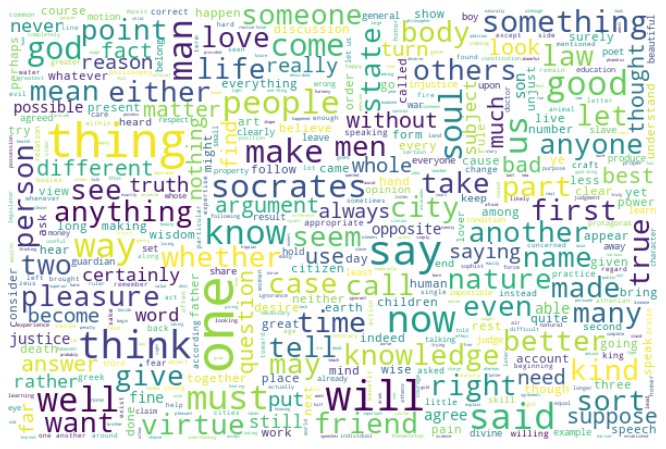

School =  aristotle :


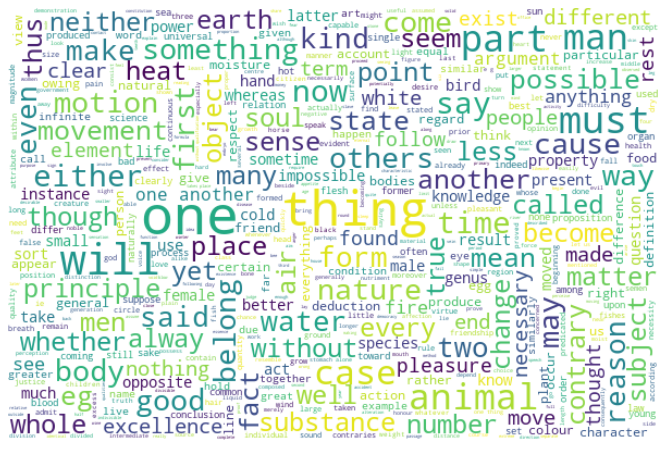

School =  empiricism :


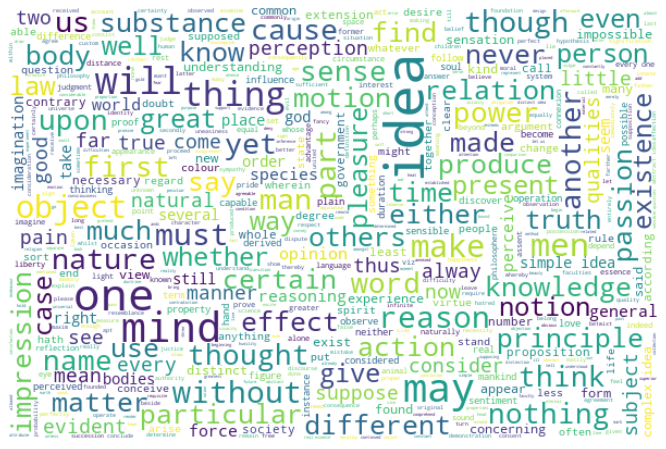

School =  rationalism :


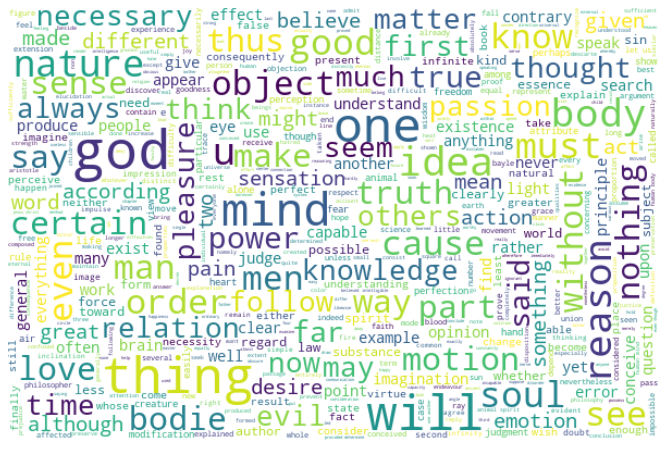

School =  analytic :


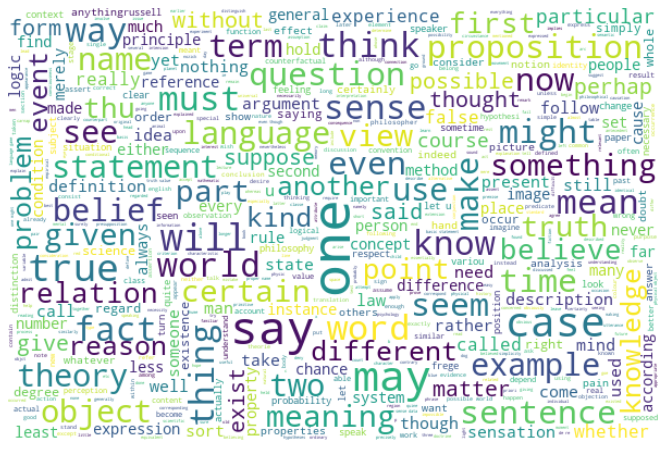

School =  continental :


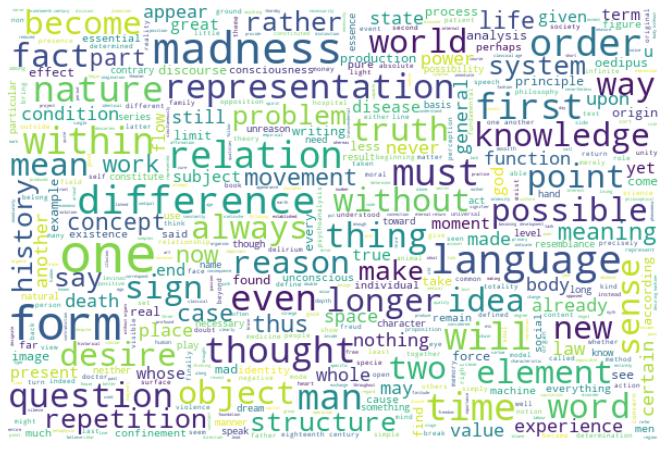

School =  phenomenology :


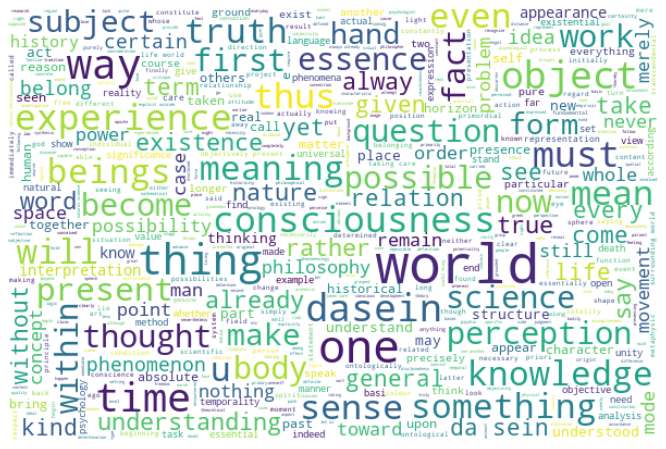

School =  german_idealism :


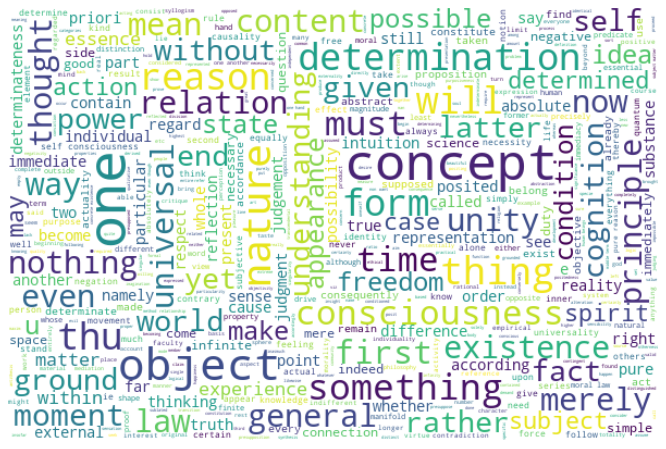

School =  communism :


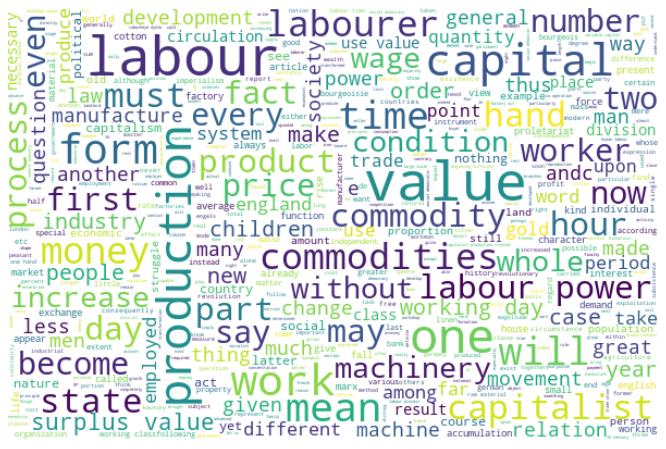

School =  capitalism :


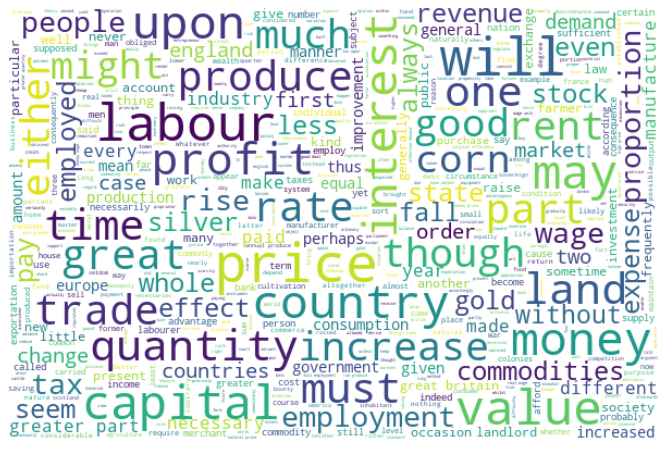

School =  stoicism :


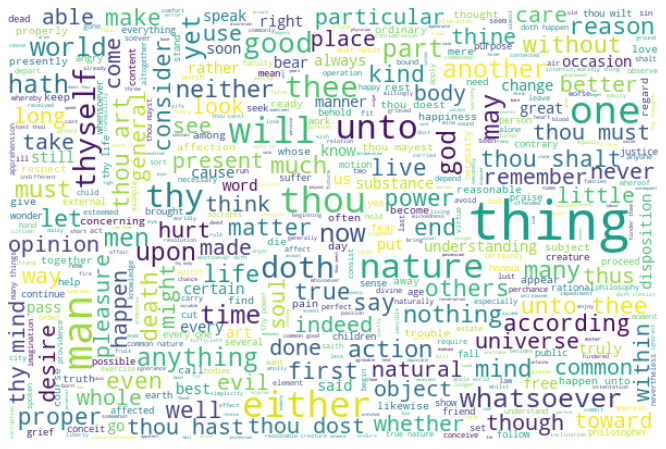

School =  nietzsche :


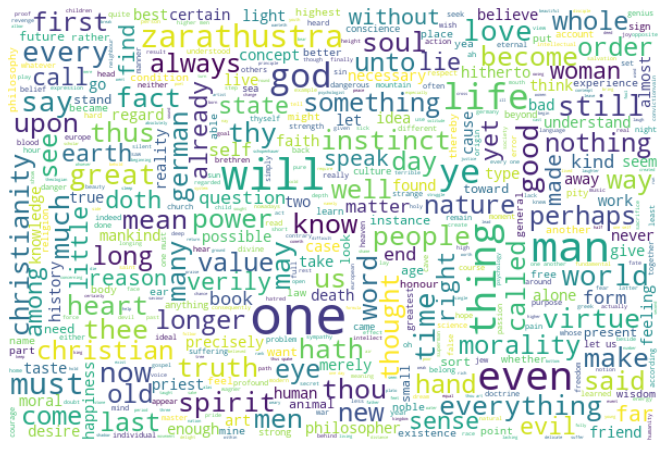

School =  feminism :


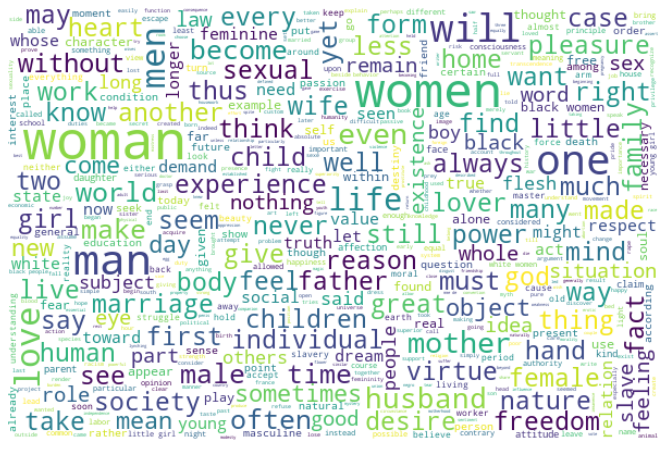

Elapsed time:  24.97


In [10]:
# need pip3 install wordcloud
# referencing from "https://www.kaggle.com/docxian/history-of-philosophy-eda-word2vec-model"
t1 = time.time()
schools = final_df.school.unique().tolist()
for school in schools:
    new_df = df[df.school==school]
    
    print('School = ', school, ':')
    words = " ".join(sentence for sentence in new_df.sentence_lowered)
    
    wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=500,
                          width = 600, height = 400,
                          background_color="white").generate(words)
    plt.figure(figsize=(12,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
t2 = time.time()
print('Elapsed time: ', np.round(t2-t1,2))

In [11]:
# word counts

In [12]:

# words = []
# for sentence in sentences:
#     tokens = nltk.word_tokenize(sentence)
#     words.extend(tokens)
# print(type(sentences))
# print(sentences)
# matrix = None
# for sentence in sentences:
#     vectorizer = CountVectorizer(stop_words='english')
#     matrix = vectorizer.fit_transform([sentence])
#     break

In [13]:
# top 10 word counts
# code is referening from "https://investigate.ai/text-analysis/counting-words-with-scikit-learns-countvectorizer/"
for school in schools:
    new_df = df[df.school==school]
    
    print('School = ', school, ':')
    text = " ".join(sentence for sentence in new_df.sentence_lowered)
    # print(type(words))
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform([text])
    counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
    print(counts.T.sort_values(by=0, ascending=False).head(10))
    

School =  plato :
             0
things    2930
say       2672
said      2331
good      2263
man       2180
think     2177
just      1950
way       1926
socrates  1866
people    1725
School =  aristotle :
            0
things   4461
man      4125
thing    2905
does     2819
good     2627
animals  2508
time     2379
case     2305
like     2164
body     2058
School =  empiricism :
           0
ideas   3486
idea    2385
mind    1942
men     1580
man     1416
things  1270
reason  1189
nature  1174
make    1167
power    990
School =  rationalism :
           0
god     3534
things  2349
mind    2188
body    1829
nature  1539
good    1396
reason  1391
man     1319
soul    1297
order   1281
School =  analytic :
             0
say       3526
true      3055
sense     2518
does      2496
case      2381
theory    2138
know      1943
way       1915
language  1853
world     1835
School =  continental :
               0
madness     2283
form        1913
language    1630
time        1624
order       1

In [14]:
# grap top 10 words

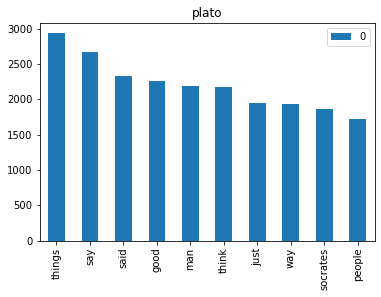

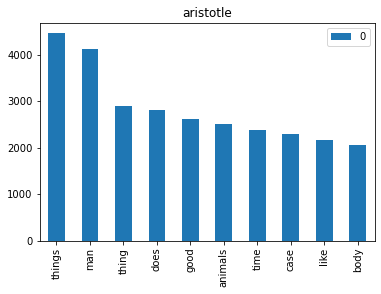

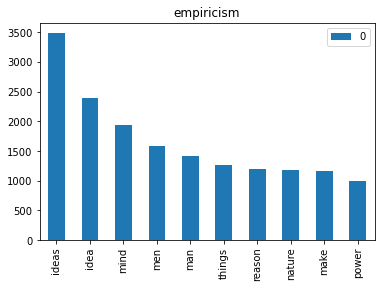

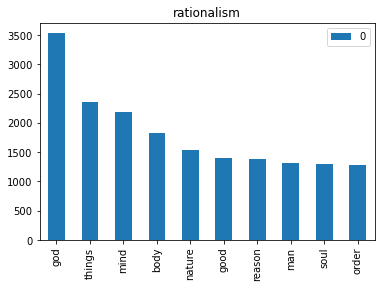

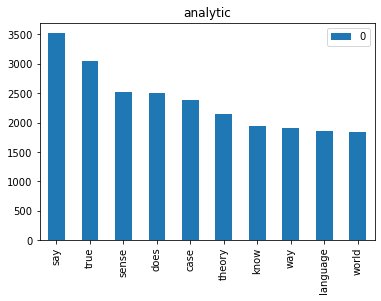

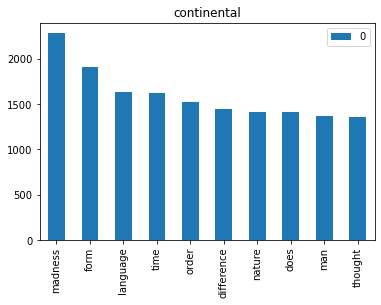

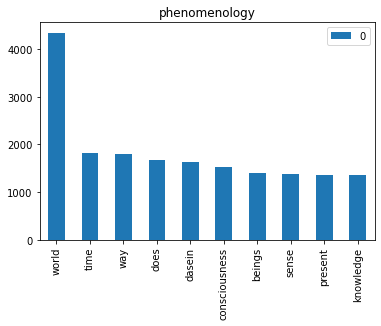

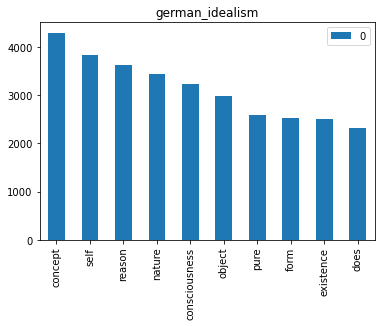

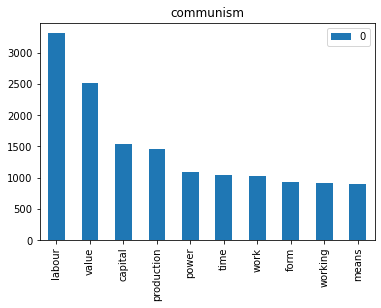

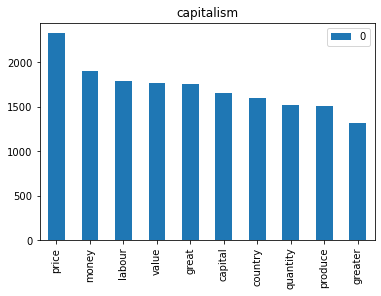

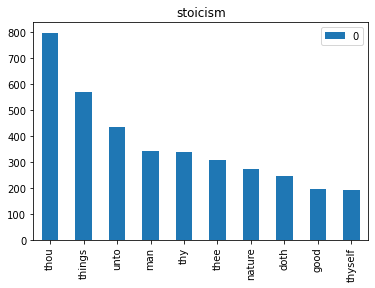

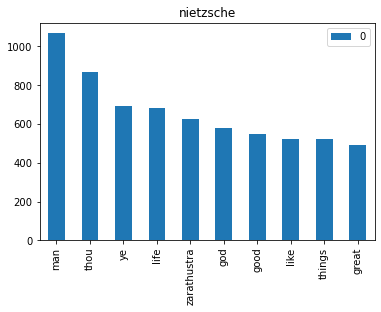

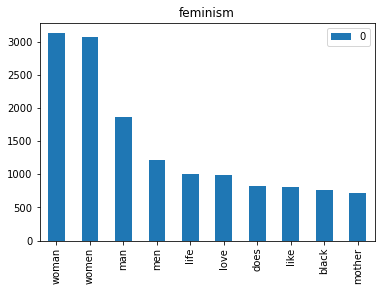

In [26]:
for school in schools:
    new_df = df[df.school==school]
    text = " ".join(sentence for sentence in new_df.sentence_lowered)
    # print(type(words))
    vectorizer = CountVectorizer(stop_words='english')
    matrix = vectorizer.fit_transform([text])
    counts = pd.DataFrame(matrix.toarray(),
                      columns=vectorizer.get_feature_names())
    top_10 = counts.T.sort_values(by = 0, ascending=False).head(10)
    top_10.plot(title = school, kind = 'bar')

In [16]:
# error with dead kernal
# vectorizer = CountVectorizer(stop_words='english')

# # Use the content column instead of our single text variable
# matrix = vectorizer.fit_transform(final_df.sentence_lowered)
# counts = pd.DataFrame(matrix.toarray(),
#                   index=final_df.school,
#                   columns=vectorizer.get_feature_names())

# counts.head()

In [17]:
# count relative word of gender for each school

In [18]:
# school_gender = {}
# for school in schools:
#     new_df = df[df.school==school]  
#     #print(new_df.sentence_lowered)
#     text = " ".join(sentence for sentence in new_df.sentence_lowered)
#     tokens = nltk.word_tokenize(text)
#     count = {"totalTokens": len(tokens), 'male': 0, 'female': 0}
#     for token in tokens:
#         if token == "man" or token == "men" or token == "male" or token == 'males':
#             count['male'] += 1
#         if token == 'women' or token == 'woman' or token == 'female' or token == 'females':
#             count['female'] += 1
#     school_gender[school] = count
# print(school_gender)         

In [19]:
# TF-IDF values 

School =  plato :
          idf_weights
say          3.704849
things       3.707581
said         3.829623
think        3.894368
good         3.956053
man          3.980908
just         4.032553
way          4.036889
socrates     4.059967
people       4.149457
School =  aristotle :
         idf_weights
things      3.586039
man         3.750770
thing       3.985534
does        3.999018
animals     4.102962
case        4.149678
time        4.231356
like        4.245467
good        4.257646
way         4.259245
School =  empiricism :
         idf_weights
ideas       2.950285
idea        3.394589
mind        3.412908
men         3.651578
man         3.789386
things      3.866575
nature      3.894293
reason      3.910746
make        3.918147
certain     4.151322
School =  rationalism :
        idf_weights
god        3.057292
things     3.413529
mind       3.485168
body       3.763135
nature     3.827305
reason     3.915790
man        3.982315
good       4.006685
order      4.014646
men      

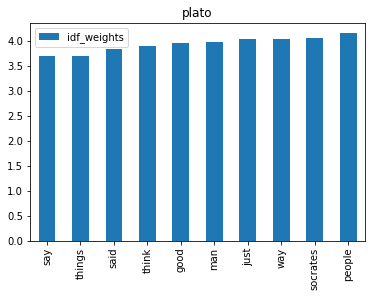

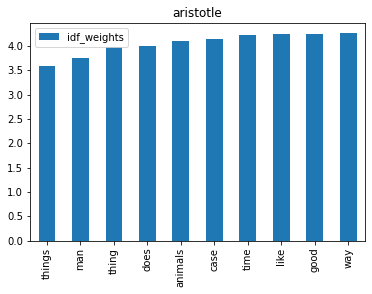

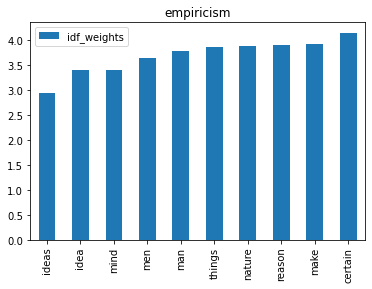

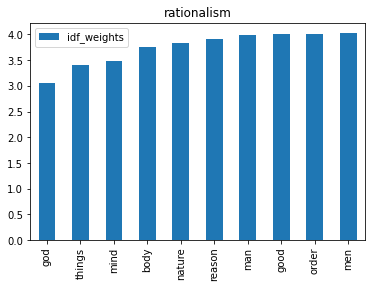

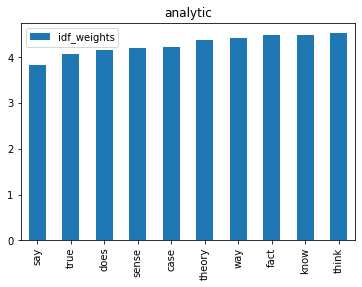

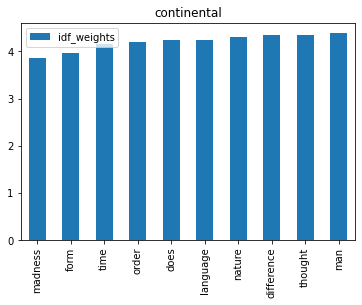

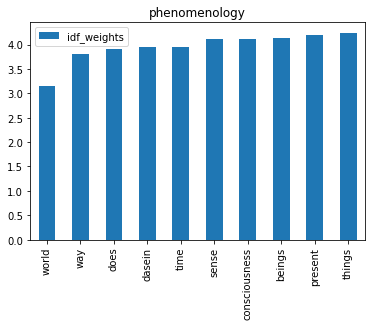

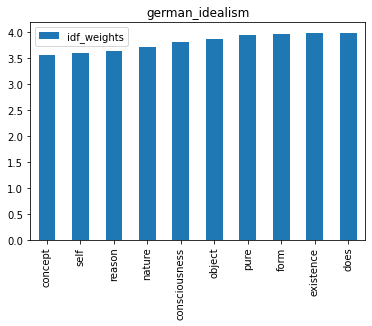

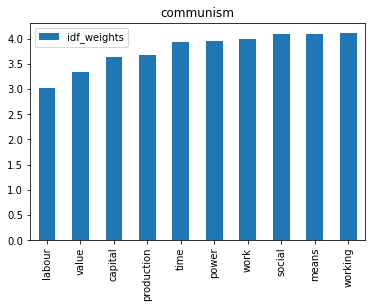

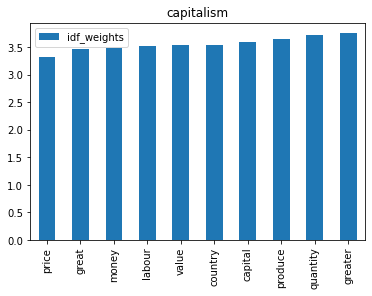

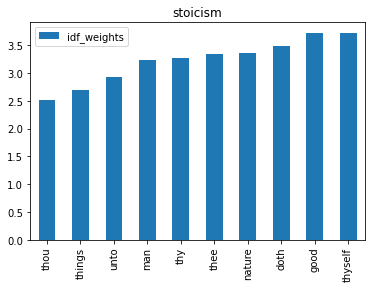

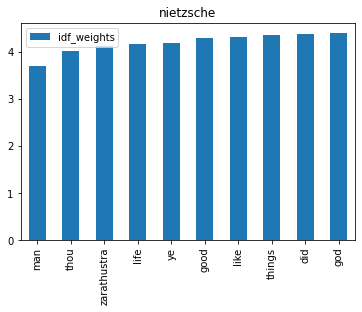

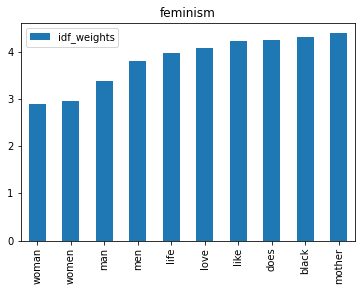

In [49]:
# code referencing from "https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/#.YVDK_mZucq0"
for school in schools:
    new_df = df[df.school==school]
    print('School = ', school, ':')
    #text = " ".join(sentence for sentence in new_df.sentence_lowered)
    cv=CountVectorizer(stop_words='english') 
    word_count_vector=cv.fit_transform(new_df.sentence_lowered)
    #print(word_count_vector.shape)
    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
    tfidf_transformer.fit(word_count_vector)
    # print idf values 
    df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
    # sort ascending 
    top_10 = df_idf.sort_values(by=['idf_weights'], ascending=True).head(10)
    print(top_10)
    top_10.plot(title = school, kind = 'bar')

In [ ]:
# From the above graps, 'man' has lowest IDF ammong every schools. 
# We can conclude that man appear every document in our dataset.